In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
pd.set_option("display.max_columns", None)

# Load data
df = pd.read_csv("../data/raw/data.csv")

df.head()


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15T02:18:49Z,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15T02:19:08Z,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15T02:44:21Z,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15T03:32:55Z,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15T03:34:21Z,2,0


## 2. Dataset Overview
Shape and Structure

In [14]:
df.shape

(95662, 16)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   TransactionId         95662 non-null  object 
 1   BatchId               95662 non-null  object 
 2   AccountId             95662 non-null  object 
 3   SubscriptionId        95662 non-null  object 
 4   CustomerId            95662 non-null  object 
 5   CurrencyCode          95662 non-null  object 
 6   CountryCode           95662 non-null  int64  
 7   ProviderId            95662 non-null  object 
 8   ProductId             95662 non-null  object 
 9   ProductCategory       95662 non-null  object 
 10  ChannelId             95662 non-null  object 
 11  Amount                95662 non-null  float64
 12  Value                 95662 non-null  int64  
 13  TransactionStartTime  95662 non-null  object 
 14  PricingStrategy       95662 non-null  int64  
 15  FraudResult        

In [16]:
df["TransactionStartTime"] = pd.to_datetime(df["TransactionStartTime"])

## 3. Summary Statistics (Numerical Features)

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CountryCode,95662.0,256.000000,0.000000,256.0,256.0,256.0,256.0,256.0
Amount,95662.0,6717.846433,123306.797164,-1000000.0,-50.0,1000.0,2800.0,9880000.0
Value,95662.0,9900.583941,123122.087776,2.0,275.0,1000.0,5000.0,9880000.0
PricingStrategy,95662.0,2.255974,0.732924,0.0,2.0,2.0,2.0,4.0
FraudResult,95662.0,0.002018,0.044872,0.0,0.0,0.0,0.0,1.0


## 4. Distribution of Numerical Features
Transaction Amount & Value

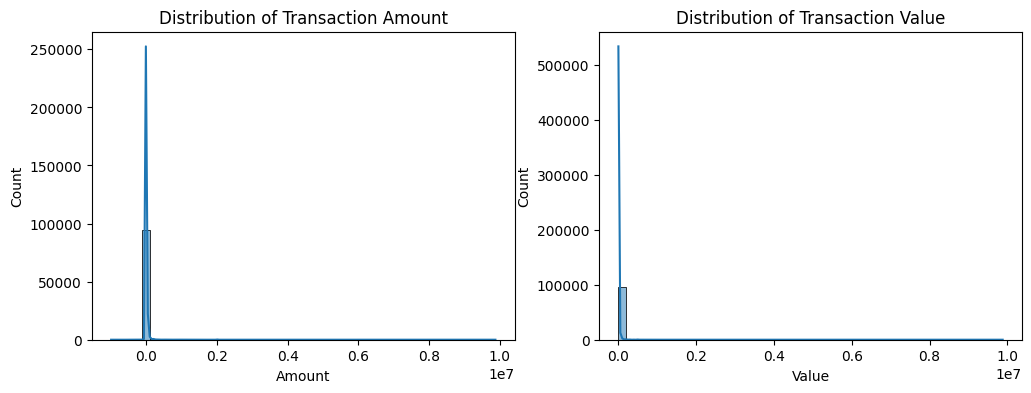

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

sns.histplot(df["Amount"], bins=50, kde=True, ax=ax[0])
ax[0].set_title("Distribution of Transaction Amount")

sns.histplot(df["Value"], bins=50, kde=True, ax=ax[1])
ax[1].set_title("Distribution of Transaction Value")

plt.show()


## 5. Distribution of Categorical Features
Channel Usage

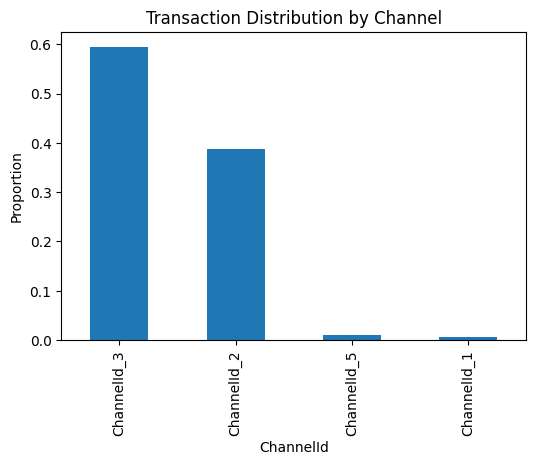

In [19]:
df["ChannelId"].value_counts(normalize=True).plot(kind="bar", figsize=(6,4))
plt.title("Transaction Distribution by Channel")
plt.ylabel("Proportion")
plt.show()


Product Categories

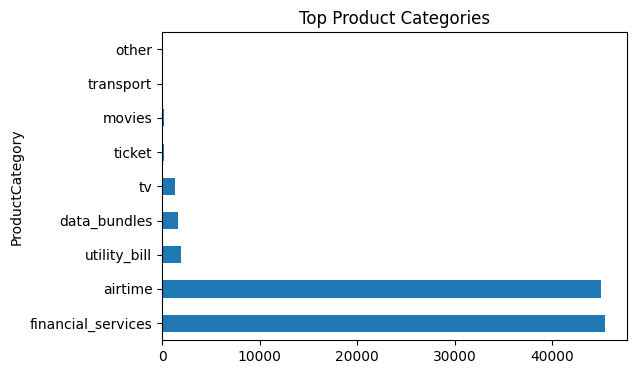

In [20]:
df["ProductCategory"].value_counts().head(10).plot(kind="barh", figsize=(6,4))
plt.title("Top Product Categories")
plt.show()


## 6. Correlation Analysis

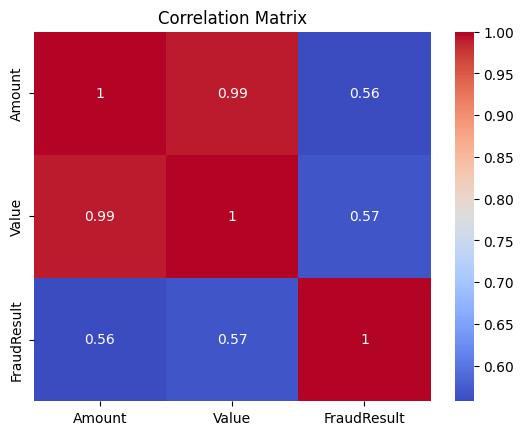

In [21]:
corr = df[["Amount", "Value", "FraudResult"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


## 7. Missing Value Analysis

In [22]:
df.isnull().sum().sort_values(ascending=False)


TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64

Visualize:

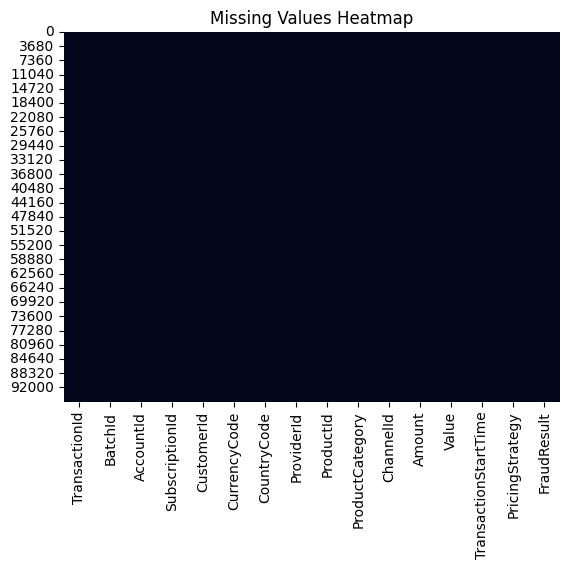

In [23]:
sns.heatmap(df.isnull(), cbar=False)
plt.title("Missing Values Heatmap")
plt.show()


## 8. Outlier Detection
Boxplots

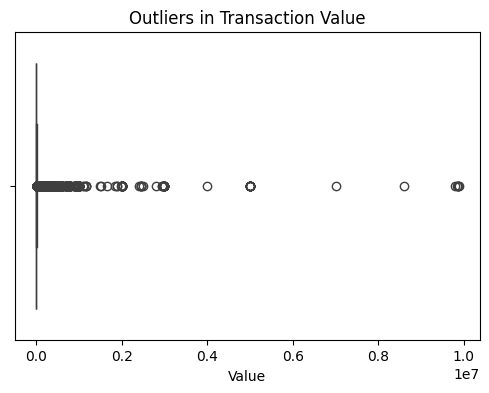

In [24]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["Value"])
plt.title("Outliers in Transaction Value")
plt.show()


## 9. Behavioral Aggregation Preview (Customer-Level)

In [25]:
customer_summary = df.groupby("CustomerId").agg(
    transaction_count=("TransactionId", "count"),
    total_amount=("Amount", "sum"),
    avg_amount=("Amount", "mean")
)

customer_summary.describe().T


,count,mean,std,min,25%,50%,75%,max
transaction_count,3742.0,25.564404,9.692960e+01,1.0,2.0000,7.000000,20.000000,4.091000e+03
total_amount,3742.0,171737.740647,2.717305e+06,-104900000.0,4077.4375,20000.000000,79967.750000,8.345124e+07
avg_amount,3742.0,15715.616012,1.676991e+05,-425000.0,1000.0000,2583.846429,4877.613636,8.601821e+06


Date range: 2018-11-15 02:18:49+00:00 to 2019-02-13 10:01:28+00:00
Unique customers: 3742
Transactions per customer: count    3742.000000
mean       25.564404
std        96.929602
min         1.000000
25%         2.000000
50%         7.000000
75%        20.000000
max      4091.000000
dtype: float64


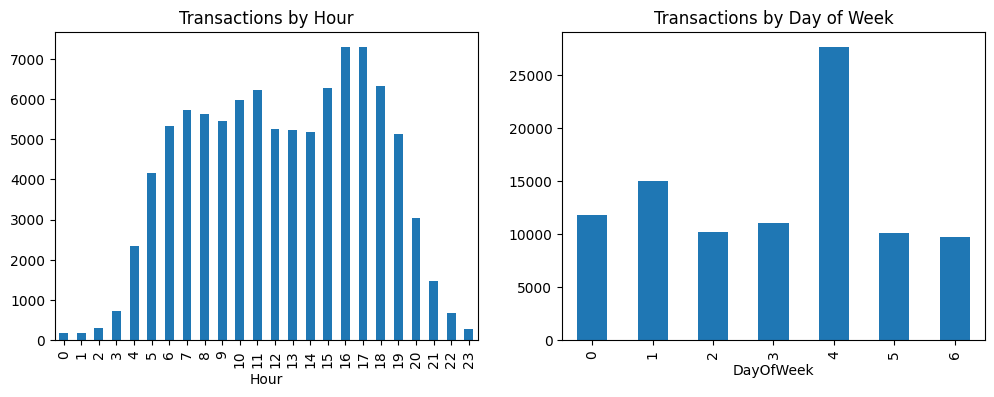

Overall fraud rate: 0.20%

Fraud rate by channel:
                 mean  count
ChannelId                   
ChannelId_1  0.007435    538
ChannelId_3  0.003232  56935
ChannelId_2  0.000135  37141
ChannelId_5  0.000000   1048

Top 5 most active customers:
                TransactionId       Amount                          Value  \
                        count          sum      mean       std        sum   
CustomerId                                                                  
CustomerId_7343          4091 -104900000.0 -25641.65  12952.60  104900000   
CustomerId_3634          2085    2628793.0   1260.81   5388.21    2726207   
CustomerId_647           1869    3633564.0   1944.12   7715.39    3905264   
CustomerId_1096           784    1949226.0   2486.26  17819.37    2041334   
CustomerId_4033           778    1768355.5   2272.95  10382.69    1927834   

                                     
                     mean       std  
CustomerId                           
CustomerId_7343

In [26]:
# 1. ACTUAL Data Quality Check
print(f"Date range: {df['TransactionStartTime'].min()} to {df['TransactionStartTime'].max()}")
print(f"Unique customers: {df['CustomerId'].nunique()}")
print(f"Transactions per customer: {df.groupby('CustomerId').size().describe()}")

# 2. Temporal Patterns (MISSING IN TEMPLATE)
df['Hour'] = df['TransactionStartTime'].dt.hour
df['DayOfWeek'] = df['TransactionStartTime'].dt.dayofweek

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
df['Hour'].value_counts().sort_index().plot(kind='bar', ax=ax1, title='Transactions by Hour')
df['DayOfWeek'].value_counts().sort_index().plot(kind='bar', ax=ax2, title='Transactions by Day of Week')
plt.show()

# 3. Fraud Pattern Analysis (CRITICAL FOR PROXY TARGET)
if 'FraudResult' in df.columns:
    fraud_rate = df['FraudResult'].mean()
    print(f"Overall fraud rate: {fraud_rate:.2%}")
    
    # Fraud by channel
    fraud_by_channel = df.groupby('ChannelId')['FraudResult'].agg(['mean', 'count'])
    print("\nFraud rate by channel:")
    print(fraud_by_channel.sort_values('mean', ascending=False))

# 4. Customer Segmentation Preview
customer_stats = df.groupby('CustomerId').agg({
    'TransactionId': 'count',
    'Amount': ['sum', 'mean', 'std'],
    'Value': ['sum', 'mean', 'std']
}).round(2)

print("\nTop 5 most active customers:")
print(customer_stats.sort_values(('TransactionId', 'count'), ascending=False).head())

# 5. Sequential Behavior (Missing in template)
# Analyze transaction frequency patterns
customer_frequency = df.groupby('CustomerId')['TransactionStartTime'].agg([
    lambda x: (x.max() - x.min()).days if len(x) > 1 else 0,
    'count'
])
customer_frequency.columns = ['active_days', 'transaction_count']
customer_frequency['txn_per_day'] = customer_frequency['transaction_count'] / customer_frequency['active_days'].replace(0, 1)

print("\nCustomer activity patterns:")
print(customer_frequency.describe())

In [27]:
# Customer distribution analysis
top_customer = df[df['CustomerId'] == 'CustomerId_7343']
print(f"Top customer accounts for {len(top_customer):,} transactions ({len(top_customer)/len(df)*100:.1f}% of all transactions)")
print(f"Top 5 customers account for {(4091+2085+1869+784+778)/len(df)*100:.1f}% of all transactions")

Top customer accounts for 4,091 transactions (4.3% of all transactions)
Top 5 customers account for 10.0% of all transactions


In [28]:
# Deep dive into fraud patterns
print(f"ChannelId_1 has {df[df['ChannelId']=='ChannelId_1']['FraudResult'].mean()*100:.2f}% fraud rate")
print(f"ChannelId_3 has {df[df['ChannelId']=='ChannelId_3']['FraudResult'].mean()*100:.2f}% fraud rate")
print(f"ChannelId_1 is {df[df['ChannelId']=='ChannelId_1']['FraudResult'].mean()/df['FraudResult'].mean():.1f}x more fraudulent than average")

ChannelId_1 has 0.74% fraud rate
ChannelId_3 has 0.32% fraud rate
ChannelId_1 is 3.7x more fraudulent than average


In [29]:
# Analyze temporal patterns
hourly_fraud = df.groupby('Hour')['FraudResult'].mean().sort_values(ascending=False)
print("Highest fraud hours:")
print(hourly_fraud.head())

Highest fraud hours:
Hour
21    0.010142
3     0.009804
0     0.005952
22    0.005857
12    0.004561
Name: FraudResult, dtype: float64


In [30]:
# Create customer segments
customer_stats = df.groupby('CustomerId').agg({
    'TransactionId': 'count',
    'Amount': ['sum', 'mean', 'std', lambda x: (x < 0).sum()],
}).round(2)

customer_stats.columns = ['txn_count', 'total_amount', 'avg_amount', 'amount_std', 'refund_count']

# Identify behavioral clusters
high_volume = customer_stats[customer_stats['txn_count'] > 100]
high_value = customer_stats[customer_stats['total_amount'].abs() > 10000]
frequent_refunders = customer_stats[customer_stats['refund_count'] > 10]

print(f"High-volume customers (>100 txn): {len(high_volume)} ({len(high_volume)/len(customer_stats)*100:.1f}%)")
print(f"High-value customers (>10k total): {len(high_value)} ({len(high_value)/len(customer_stats)*100:.1f}%)")
print(f"Frequent refunders (>10 refunds): {len(frequent_refunders)} ({len(frequent_refunders)/len(customer_stats)*100:.1f}%)")

High-volume customers (>100 txn): 182 (4.9%)
High-value customers (>10k total): 2419 (64.6%)
Frequent refunders (>10 refunds): 674 (18.0%)


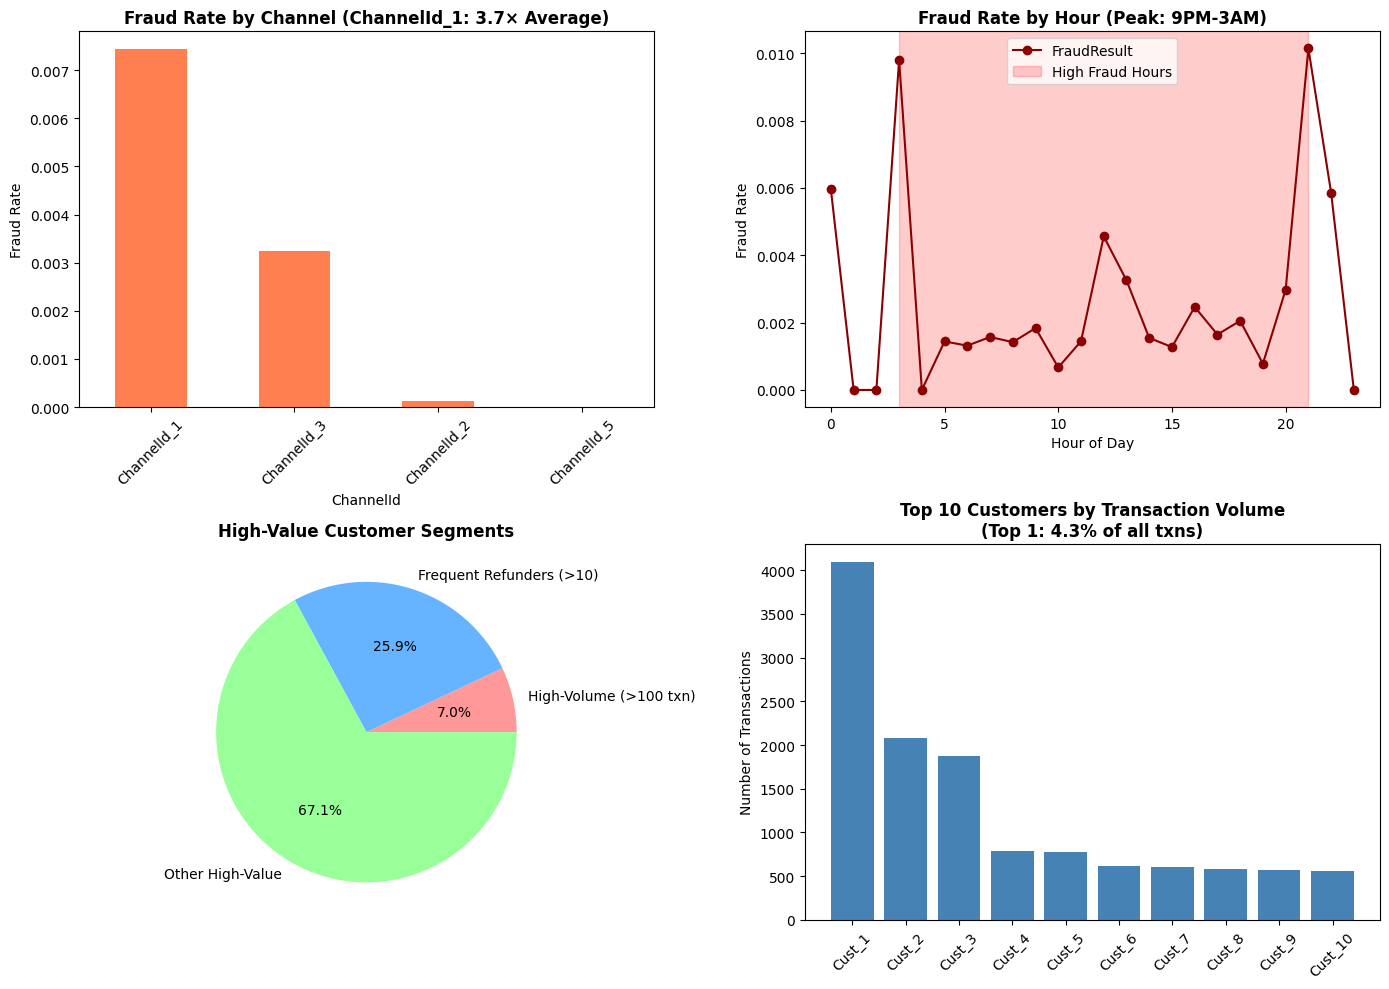

In [32]:
# Create a summary visualization of key findings
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Fraud by Channel (Bar Chart)
fraud_by_channel = df.groupby('ChannelId')['FraudResult'].mean().sort_values(ascending=False)
fraud_by_channel.plot(kind='bar', ax=axes[0,0], color='coral')
axes[0,0].set_title('Fraud Rate by Channel (ChannelId_1: 3.7× Average)', fontweight='bold')
axes[0,0].set_ylabel('Fraud Rate')
axes[0,0].tick_params(axis='x', rotation=45)

# 2. Fraud by Hour (Line Chart)
hourly_fraud = df.groupby('Hour')['FraudResult'].mean()
hourly_fraud.plot(kind='line', ax=axes[0,1], marker='o', color='darkred')
axes[0,1].axvspan(21, 3, alpha=0.2, color='red', label='High Fraud Hours')
axes[0,1].set_title('Fraud Rate by Hour (Peak: 9PM-3AM)', fontweight='bold')
axes[0,1].set_xlabel('Hour of Day')
axes[0,1].set_ylabel('Fraud Rate')
axes[0,1].legend()

# 3. Customer Segments (Pie Chart)
segment_sizes = [182, 674, 2419 - 674]  # High-volume, Frequent refunders, Other high-value
segment_labels = ['High-Volume (>100 txn)', 'Frequent Refunders (>10)', 'Other High-Value']
axes[1,0].pie(segment_sizes, labels=segment_labels, autopct='%1.1f%%', 
              colors=['#ff9999','#66b3ff','#99ff99'])
axes[1,0].set_title('High-Value Customer Segments', fontweight='bold')

# 4. Transaction Concentration (Bar Chart)
top_n = 10
customer_txns = df['CustomerId'].value_counts().head(top_n)
axes[1,1].bar(range(top_n), customer_txns.values, color='steelblue')
axes[1,1].set_xticks(range(top_n))
axes[1,1].set_xticklabels([f'Cust_{i+1}' for i in range(top_n)], rotation=45)
axes[1,1].set_title(f'Top {top_n} Customers by Transaction Volume\n(Top 1: 4.3% of all txns)', fontweight='bold')
axes[1,1].set_ylabel('Number of Transactions')

plt.tight_layout()
plt.show()